# Proyek Analisis Data : Bike Sharing Dataset

- **Nama :** Tegar Kamarulzaman
- **Email :** Kamarulzamant@gmail.com
- **ID Dicoding :** -

## Menentukan Pertanyaan Bisnis

- Bagaimana Perbandingan jumlah casual user dan jumlah regirtered user selama ini?
- Bagaimana Performa Bike Sharing selama tahun 2011 - 2012?
- Apakah perubahan musim serta cuaca mempengaruhi performa Bike Sharing?
- Apakah terdapat perbedaan jumlah pengguna Bike Sharing saat weekday dan weekend serta hari libur?
- Bagaimana gambaran jumlah pengguna bike sharing dalam 24 jam setiap harinya?

## Import Semua Packages/Library yang Digunakan

Library yang akan kita gunakan ada 4 yaitu :
- Numpy yang akan kita gunakan untuk perhitungan matematika yang cukup koplek seperti array dan lainnya.
- Pandas digunakan untuk melakukan pengolah serta manipulasi data.
- Matplotlib.pyplot akan kita gunakan untuk membuat grafik atau plot.
- Matplotlib.ticker akan kita gunakan untuk melakukan pengubahan format angka.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Data Wrangling

### Gathering Data

Dataset yang digunakan adalah dataset dari Perusahaan Capital Bike Sharing System yang berfokus pada sistem peminjaman sepeda. Data ini dikumpulkan selama 2 tahun dari 2011 sampai 2012. Dalam dataset bike sharing terdapat dua dataset yang tersedia yaitu dataset "hour" dan dataset "days". Kedua dataset tersebut hanya berbeda dalam pengumpulan datanya, apabila data set hour data dikumpulkan setiap jam sedangkan dataset days dikumpulkan setiap hari.

In [77]:
hour_data = pd.read_csv("/content/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [78]:
day_data = pd.read_csv("/content/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dari kedua tabel dapat dilihat tidak ada perbedaan pada masing - masing data ataupun kolom. Satu hal yang berbeda hanya pada dataset hour terdapat sebuah kolom hour sedangkan dataset day tidak ada kolom tersebut. Karena memang dari keterangan sumber data bahwa data tersebut hanya berbeda dalam waktu pengambilan data. Apabila data day itu diambil setiap hari, sedangkan data hour diambil setiap jam sesuai dengan nama dataset.

## Assessing Data

#### Mengenal Data

In [79]:
hour_data.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.0,27.0,32.0


In [80]:
day_data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


Dari kedua tabel tersebut memiliki sekitar 16 kolom yang sama pada kedua tabel, serta 1 kolom yang berbeda yaitu kolom hr di dataset hr. Jadi terdapat 17 kolom yang berbeda pada kedua tabel tersebut. Berikut penjelasan menganai kolom - kolom tersebut dari sumber data:
- instant : Record index
- dteday : Tanggal waktu pengambilan data
- season : Musim saat pengambilan data
- yr : Tahun waktu pengambilan data
- mnth : Bulan waktu pengambilan data
- hr : Jam waktu pengambilan data
- holiday : keterangan apakah saat pengambilan data hari libur atau tidak
- weekday : Nama hari dalam satu minggu
- workingday : keterangan apakah saat pengambilan data hari kerja atau tidak
- weathersit : Cuaca saat pengambilan data
- temp : Suhu saat pengambilan data
- atemp : Suhu yang dirasakan saat pengembilan data
- hum : Kelembapan saat pengambilan data
- windspeed : Kecepatan angin saat pengambilan data
- casual : Jumlah pengguna casual atau biasa
- registered : Jumlah penguna terdaftar
- cnt : Total seluruh pengguna rental bike

Dilihat dari nama kolom serta isi kolom, terdapat nama kolom yang terlalu disingkat dan tidak mengambarkan nilai dari kolom tersebut. serta terdapat nilai dari beberapa kolom yang masih berupa kode seperti pada weekday yang harusnya berisi nama - nama hari tetapi hanya ditulis kode angka dari 0-6. Maka harus dilakukan penggantian nama kolom serta isi dari kolom untuk memudahkan proses analisis serta memudahkan stakeholder atau orang yang berkepentingan untuk melihat data yang ada.

#### Melihat Statistik dari masing - masing data

In [81]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000
mean,7894.000000,2.400329,0.452398,6.049154,11.545575,0.027174,2.998733,0.685627,1.414138,0.512642,0.489450,0.626009,0.190301,36.712593,152.213100,188.925694
std,4557.458685,1.054511,0.497745,3.220357,6.913412,0.162596,2.002943,0.464280,0.639724,0.193177,0.172296,0.194823,0.122143,50.043023,150.410195,181.542286
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3947.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.360000,0.348500,0.470000,0.104500,4.000000,34.000000,40.000000
50%,7894.000000,2.000000,0.000000,6.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.540000,0.500000,0.630000,0.194000,17.000000,114.000000,141.000000
75%,11840.500000,3.000000,1.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,50.000000,218.000000,280.000000
max,15787.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [82]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dilihat dari data tersebut tidak terdapat anomali dari masing - masing kolom dan data tersebut terlihat baik. Namun untuk memastikannya kita akan melakukan pengecekan lebih lanjut seperti missing dan duplicate dan lainnya.

#### Mengecek Kesusaian Tipe data Dari masing masing variabel

In [83]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15787 non-null  int64  
 1   dteday      15787 non-null  object 
 2   season      15787 non-null  int64  
 3   yr          15787 non-null  int64  
 4   mnth        15787 non-null  int64  
 5   hr          15787 non-null  int64  
 6   holiday     15787 non-null  int64  
 7   weekday     15787 non-null  int64  
 8   workingday  15787 non-null  int64  
 9   weathersit  15787 non-null  int64  
 10  temp        15787 non-null  float64
 11  atemp       15787 non-null  float64
 12  hum         15786 non-null  float64
 13  windspeed   15786 non-null  float64
 14  casual      15786 non-null  float64
 15  registered  15786 non-null  float64
 16  cnt         15786 non-null  float64
dtypes: float64(7), int64(9), object(1)
memory usage: 2.0+ MB


In [84]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Untuk tipe data terdapat sebuah variabel yang harus diubah tipe datanya, yaitu dteday yang menurut saya lebih cocok menggunakan tipe data date dibadingkan dengan tipe data obejct. Lalu untuk tipe data season, weathersit, weekday akan diubah menjadi kategory. Karena value dari kolom tersebut akan kita ubah menjadi keterangan asli yang sebelumnya hanya kode angka.

#### Mengecek apakah terdapat duplicate data

In [85]:
print ("Total data duplicate hour dataset : ",hour_data.duplicated().sum())
print ("Total data duplicate day dataset : ",day_data.duplicated().sum())

Total data duplicate hour dataset :  0
Total data duplicate day dataset :  0


Dari hasil pengecekan tidak terdapat duplikasi data.

#### Mengecek apakah terdapat missing data

In [86]:
hour_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [87]:
day_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dari hasil pengecekan tidak terdapat data yang hilang

### Cleaning Data

#### Mengubah tipe data dan isi serta nama pada kolom tertentu untuk menyesuaikan dengan informasi

Sesuai dari hasil assesment tadi terdapat beberapa kolom yang namanya tidak menggambarkan nilai dari kolom tersebut maka kita akan mengubahnya. Lalu terdapat juga tipe data yang tidak sesuai dengan data yang ada.

##### Melakukan perombakan nama kolom dan tipe data pada Tabel Hour



- Mengubah nama kolom yang menurut saya kurang menggambarkan nilai dari kolom tersebut

In [88]:
hour_data = hour_data.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weather', 'temp': 'temperature', 'atemp': 'feeling_temperature', 'hum': 'humidity', 'cnt': 'total_user'})
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   instant              15787 non-null  int64  
 1   date                 15787 non-null  object 
 2   season               15787 non-null  int64  
 3   year                 15787 non-null  int64  
 4   month                15787 non-null  int64  
 5   hour                 15787 non-null  int64  
 6   holiday              15787 non-null  int64  
 7   weekday              15787 non-null  int64  
 8   workingday           15787 non-null  int64  
 9   weather              15787 non-null  int64  
 10  temperature          15787 non-null  float64
 11  feeling_temperature  15787 non-null  float64
 12  humidity             15786 non-null  float64
 13  windspeed            15786 non-null  float64
 14  casual               15786 non-null  float64
 15  registered           15786 non-null 

Perubahan ini ditujukan untuk memudahkan dalam proses analisis, selain itu perubahan ini dapat membantu kita maupun orang lain yang terkait dapat lebih mudah memahami isi data tersebut.

- Mengganti Tipe data dari kolom date menjadi datetime yang sesuai dengan datanya

In [89]:
hour_data['date'] = pd.to_datetime(hour_data['date'])
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              15787 non-null  int64         
 1   date                 15787 non-null  datetime64[ns]
 2   season               15787 non-null  int64         
 3   year                 15787 non-null  int64         
 4   month                15787 non-null  int64         
 5   hour                 15787 non-null  int64         
 6   holiday              15787 non-null  int64         
 7   weekday              15787 non-null  int64         
 8   workingday           15787 non-null  int64         
 9   weather              15787 non-null  int64         
 10  temperature          15787 non-null  float64       
 11  feeling_temperature  15787 non-null  float64       
 12  humidity             15786 non-null  float64       
 13  windspeed            15786 non-

- Mengubah isi dari kolom season yang sebelumnya hanya berupa kode angka menjadi nama musim

In [90]:
hour_data['season'] = hour_data['season'].astype('category')

hour_data['season'] = hour_data['season'].replace(
    [ 1, 2, 3, 4],
    [ 'Spring', 'Summer', 'Fall', 'Winter' ]
)
hour_data.head(10)
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              15787 non-null  int64         
 1   date                 15787 non-null  datetime64[ns]
 2   season               15787 non-null  category      
 3   year                 15787 non-null  int64         
 4   month                15787 non-null  int64         
 5   hour                 15787 non-null  int64         
 6   holiday              15787 non-null  int64         
 7   weekday              15787 non-null  int64         
 8   workingday           15787 non-null  int64         
 9   weather              15787 non-null  int64         
 10  temperature          15787 non-null  float64       
 11  feeling_temperature  15787 non-null  float64       
 12  humidity             15786 non-null  float64       
 13  windspeed            15786 non-

<ipython-input-90-0f925dafd86b>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_data['season'] = hour_data['season'].replace(


- Mengubah isi dari kolom year yang sebelumnya hanya berupa kode angka menjadi tahun waktu dari pengambilan data

In [91]:
hour_data['year'] = hour_data['year'].replace(
    [0,1],
    [ 2011, 2012 ]
)
hour_data.head(10)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user
0,1,2011-01-01,Spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2,2011-01-01,Spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3,2011-01-01,Spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4,2011-01-01,Spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5,2011-01-01,Spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6,2011-01-01,Spring,2011,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
6,7,2011-01-01,Spring,2011,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2.0,0.0,2.0
7,8,2011-01-01,Spring,2011,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1.0,2.0,3.0
8,9,2011-01-01,Spring,2011,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0
9,10,2011-01-01,Spring,2011,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8.0,6.0,14.0


- Mengubah isi dari kolom weather yang sebelumnya hanya berupa kode angka menjadi nama cuaca

In [92]:
hour_data['weather'] = hour_data['weather'].astype('category')

hour_data['weather'] = hour_data['weather'].replace(
    [ 1, 2, 3, 4],
    [ 'Clear', 'Cloudy', 'Light Snow or Light Rain', 'Thunderstrom']
)
hour_data.head(10)

<ipython-input-92-a0e6ad34feec>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_data['weather'] = hour_data['weather'].replace(


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user
0,1,2011-01-01,Spring,2011,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2,2011-01-01,Spring,2011,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3,2011-01-01,Spring,2011,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4,2011-01-01,Spring,2011,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5,2011-01-01,Spring,2011,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6,2011-01-01,Spring,2011,1,5,0,6,0,Cloudy,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
6,7,2011-01-01,Spring,2011,1,6,0,6,0,Clear,0.22,0.2727,0.80,0.0000,2.0,0.0,2.0
7,8,2011-01-01,Spring,2011,1,7,0,6,0,Clear,0.20,0.2576,0.86,0.0000,1.0,2.0,3.0
8,9,2011-01-01,Spring,2011,1,8,0,6,0,Clear,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0
9,10,2011-01-01,Spring,2011,1,9,0,6,0,Clear,0.32,0.3485,0.76,0.0000,8.0,6.0,14.0


- Mengubah isi dari kolom month yang sebelumnya hanya berupa kode angka menjadi nama bulan waktu dari pengambilan data

In [93]:
hour_data['month'] = hour_data['month'].astype('category')

hour_data['month'] = hour_data['month'].replace(
    [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
hour_data.head(10)


<ipython-input-93-d4db10a0cdf4>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_data['month'] = hour_data['month'].replace(


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user
0,1,2011-01-01,Spring,2011,January,0,0,6,0,Clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2,2011-01-01,Spring,2011,January,1,0,6,0,Clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3,2011-01-01,Spring,2011,January,2,0,6,0,Clear,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4,2011-01-01,Spring,2011,January,3,0,6,0,Clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5,2011-01-01,Spring,2011,January,4,0,6,0,Clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6,2011-01-01,Spring,2011,January,5,0,6,0,Cloudy,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
6,7,2011-01-01,Spring,2011,January,6,0,6,0,Clear,0.22,0.2727,0.80,0.0000,2.0,0.0,2.0
7,8,2011-01-01,Spring,2011,January,7,0,6,0,Clear,0.20,0.2576,0.86,0.0000,1.0,2.0,3.0
8,9,2011-01-01,Spring,2011,January,8,0,6,0,Clear,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0
9,10,2011-01-01,Spring,2011,January,9,0,6,0,Clear,0.32,0.3485,0.76,0.0000,8.0,6.0,14.0


- Menambahkan kolom baru yaitu day_of_week yang akan berisi nilai dari kolom weekday namun telah diubah dari kode angka menjadi nama hari

In [94]:
day_maping = {
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

hour_data['day_of_week'] = hour_data['weekday'].map(day_maping)
hour_data.head(10)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user,day_of_week
0,1,2011-01-01,Spring,2011,January,0,0,6,0,Clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,Saturday
1,2,2011-01-01,Spring,2011,January,1,0,6,0,Clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,Saturday
2,3,2011-01-01,Spring,2011,January,2,0,6,0,Clear,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,Saturday
3,4,2011-01-01,Spring,2011,January,3,0,6,0,Clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,Saturday
4,5,2011-01-01,Spring,2011,January,4,0,6,0,Clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,Saturday
5,6,2011-01-01,Spring,2011,January,5,0,6,0,Cloudy,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,Saturday
6,7,2011-01-01,Spring,2011,January,6,0,6,0,Clear,0.22,0.2727,0.80,0.0000,2.0,0.0,2.0,Saturday
7,8,2011-01-01,Spring,2011,January,7,0,6,0,Clear,0.20,0.2576,0.86,0.0000,1.0,2.0,3.0,Saturday
8,9,2011-01-01,Spring,2011,January,8,0,6,0,Clear,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0,Saturday
9,10,2011-01-01,Spring,2011,January,9,0,6,0,Clear,0.32,0.3485,0.76,0.0000,8.0,6.0,14.0,Saturday


- Mengubah isi dari kolom weekday yang sudah di pindah ke kolom day_of_week menjadi keterangan weekday dan weekend

In [95]:
hour_data['weekday'] = hour_data['weekday'].apply(
    lambda x : 'weekend' if x in [0,6] else 'weekday'
)
hour_data.head(10)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user,day_of_week
0,1,2011-01-01,Spring,2011,January,0,0,weekend,0,Clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,Saturday
1,2,2011-01-01,Spring,2011,January,1,0,weekend,0,Clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,Saturday
2,3,2011-01-01,Spring,2011,January,2,0,weekend,0,Clear,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,Saturday
3,4,2011-01-01,Spring,2011,January,3,0,weekend,0,Clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,Saturday
4,5,2011-01-01,Spring,2011,January,4,0,weekend,0,Clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,Saturday
5,6,2011-01-01,Spring,2011,January,5,0,weekend,0,Cloudy,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,Saturday
6,7,2011-01-01,Spring,2011,January,6,0,weekend,0,Clear,0.22,0.2727,0.80,0.0000,2.0,0.0,2.0,Saturday
7,8,2011-01-01,Spring,2011,January,7,0,weekend,0,Clear,0.20,0.2576,0.86,0.0000,1.0,2.0,3.0,Saturday
8,9,2011-01-01,Spring,2011,January,8,0,weekend,0,Clear,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0,Saturday
9,10,2011-01-01,Spring,2011,January,9,0,weekend,0,Clear,0.32,0.3485,0.76,0.0000,8.0,6.0,14.0,Saturday


Tujuan perubahan ini untuk menentukan apakah hari ini termasuk weekend atau weekday, hal ini nantinya akan membantu untuk menjawab pertanyaan no 4.

- Menghapus kolom yang tidak digunakan

 Menghapus kolom instant yang memang tidak akan digunakan di tabel day dan hour karena tidak diperlukan untuk analisis. Untuk kolom holiday dan workingday hanya akan kita gunakan pada tabel day untuk tabel hour akan kita hapus karena tidak dibutuhkan untuk analisis pada tabel hour.

In [96]:
hour_data = hour_data.drop(['instant', 'holiday', 'workingday'], axis = 1)
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 15787 non-null  datetime64[ns]
 1   season               15787 non-null  category      
 2   year                 15787 non-null  int64         
 3   month                15787 non-null  category      
 4   hour                 15787 non-null  int64         
 5   weekday              15787 non-null  object        
 6   weather              15787 non-null  category      
 7   temperature          15787 non-null  float64       
 8   feeling_temperature  15787 non-null  float64       
 9   humidity             15786 non-null  float64       
 10  windspeed            15786 non-null  float64       
 11  casual               15786 non-null  float64       
 12  registered           15786 non-null  float64       
 13  total_user           15786 non-

##### Melakukan perombakan nama kolom dan tipe data pada Tabel Day

Untuk proses perombakan akan sama seperti pada kolom hour namun ada sedikit perbedaan dibeberapa kolom. Untuk proses yang sama tidak akan diberi keterangan dan keterangan akan di berikan untuk proses yang berbeda

In [97]:
day_data = day_data.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'temp': 'temperature', 'atemp': 'feeling_temperature', 'hum': 'humidity', 'cnt': 'total_user'})
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   instant              731 non-null    int64  
 1   date                 731 non-null    object 
 2   season               731 non-null    int64  
 3   year                 731 non-null    int64  
 4   month                731 non-null    int64  
 5   holiday              731 non-null    int64  
 6   weekday              731 non-null    int64  
 7   workingday           731 non-null    int64  
 8   weather              731 non-null    int64  
 9   temperature          731 non-null    float64
 10  feeling_temperature  731 non-null    float64
 11  humidity             731 non-null    float64
 12  windspeed            731 non-null    float64
 13  casual               731 non-null    int64  
 14  registered           731 non-null    int64  
 15  total_user           731 non-null    int

In [98]:
day_data['date'] = pd.to_datetime(day_data['date'])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   date                 731 non-null    datetime64[ns]
 2   season               731 non-null    int64         
 3   year                 731 non-null    int64         
 4   month                731 non-null    int64         
 5   holiday              731 non-null    int64         
 6   weekday              731 non-null    int64         
 7   workingday           731 non-null    int64         
 8   weather              731 non-null    int64         
 9   temperature          731 non-null    float64       
 10  feeling_temperature  731 non-null    float64       
 11  humidity             731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual               731 non-null  

In [99]:
day_data['season'] = day_data['season'].astype('category')

day_data['season'] = day_data['season'].replace(
    [ 1, 2, 3, 4],
    [ 'Spring', 'Summer', 'Fall', 'Winter' ]
)
day_data.head(10)

<ipython-input-99-9bb0dd88b8ed>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_data['season'] = day_data['season'].replace(


,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [100]:
day_data['year'] = day_data['year'].replace(
    [0,1],
    [ 2011, 2012 ]
)
day_data.head(10)


,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user
0,1,2011-01-01,Spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,2011,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,2011,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,2011,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,2011,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,2011,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [101]:
day_data['weather'] = day_data['weather'].astype('category')

day_data['weather'] = day_data['weather'].replace(
    [ 1, 2, 3, 4],
    [ 'Clear', 'Cloudy', 'Light Snow or Light Rain', 'Thunderstrom']
)
day_data.head(10)

<ipython-input-101-e2a206f23139>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_data['weather'] = day_data['weather'].replace(


,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user
0,1,2011-01-01,Spring,2011,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,2011,1,0,4,1,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,2011,1,0,5,1,Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,2011,1,0,6,0,Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,2011,1,0,0,0,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,2011,1,0,1,1,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [102]:
day_data['month'] = day_data['month'].astype('category')

day_data['month'] = day_data['month'].replace(
    [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
day_data.head(10)


<ipython-input-102-d74c8401c3f0>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_data['month'] = day_data['month'].replace(


,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user
0,1,2011-01-01,Spring,2011,January,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,2011,January,0,4,1,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,2011,January,0,5,1,Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,2011,January,0,6,0,Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,2011,January,0,0,0,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,2011,January,0,1,1,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [103]:
day_maping = {
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

day_data['day_of_week'] = day_data['weekday'].map(day_maping)
day_data.head(10)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user,day_of_week
0,1,2011-01-01,Spring,2011,January,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-02,Spring,2011,January,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,3,2011-01-03,Spring,2011,January,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,4,2011-01-04,Spring,2011,January,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,5,2011-01-05,Spring,2011,January,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday
5,6,2011-01-06,Spring,2011,January,0,4,1,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606,Thursday
6,7,2011-01-07,Spring,2011,January,0,5,1,Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510,Friday
7,8,2011-01-08,Spring,2011,January,0,6,0,Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959,Saturday
8,9,2011-01-09,Spring,2011,January,0,0,0,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822,Sunday
9,10,2011-01-10,Spring,2011,January,0,1,1,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321,Monday


In [104]:
day_data['weekday'] = day_data['weekday'].apply(
    lambda x : 'Weekend' if x in [0,6] else 'Weekday'
)
day_data.head(10)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user,day_of_week
0,1,2011-01-01,Spring,2011,January,0,Weekend,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-02,Spring,2011,January,0,Weekend,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,3,2011-01-03,Spring,2011,January,0,Weekday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,4,2011-01-04,Spring,2011,January,0,Weekday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,5,2011-01-05,Spring,2011,January,0,Weekday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday
5,6,2011-01-06,Spring,2011,January,0,Weekday,1,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606,Thursday
6,7,2011-01-07,Spring,2011,January,0,Weekday,1,Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510,Friday
7,8,2011-01-08,Spring,2011,January,0,Weekend,0,Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959,Saturday
8,9,2011-01-09,Spring,2011,January,0,Weekend,0,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822,Sunday
9,10,2011-01-10,Spring,2011,January,0,Weekday,1,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321,Monday


In [105]:
day_data = day_data.drop('instant', axis = 1)
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 731 non-null    datetime64[ns]
 1   season               731 non-null    category      
 2   year                 731 non-null    int64         
 3   month                731 non-null    category      
 4   holiday              731 non-null    int64         
 5   weekday              731 non-null    object        
 6   workingday           731 non-null    int64         
 7   weather              731 non-null    category      
 8   temperature          731 non-null    float64       
 9   feeling_temperature  731 non-null    float64       
 10  humidity             731 non-null    float64       
 11  windspeed            731 non-null    float64       
 12  casual               731 non-null    int64         
 13  registered           731 non-null  

- Mengubah isi kolom holiday dari kode angka menjadi keterangan holiday atau not holiday

In [106]:
day_data['holiday'] = day_data['holiday'].astype('category')
day_data['holiday'] = day_data['holiday'].replace( [ 0,1 ], [ 'Not Holiday', 'Holiday'] )
day_data.head(10)

<ipython-input-106-46c81c90e208>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_data['holiday'] = day_data['holiday'].replace( [ 0,1 ], [ 'Not Holiday', 'Holiday'] )


,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user,day_of_week
0,2011-01-01,Spring,2011,January,Not Holiday,Weekend,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2011-01-02,Spring,2011,January,Not Holiday,Weekend,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,2011-01-03,Spring,2011,January,Not Holiday,Weekday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,2011-01-04,Spring,2011,January,Not Holiday,Weekday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,2011-01-05,Spring,2011,January,Not Holiday,Weekday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday
5,2011-01-06,Spring,2011,January,Not Holiday,Weekday,1,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606,Thursday
6,2011-01-07,Spring,2011,January,Not Holiday,Weekday,1,Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510,Friday
7,2011-01-08,Spring,2011,January,Not Holiday,Weekend,0,Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959,Saturday
8,2011-01-09,Spring,2011,January,Not Holiday,Weekend,0,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822,Sunday
9,2011-01-10,Spring,2011,January,Not Holiday,Weekday,1,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321,Monday


- Mengubah isi kolom workingday dari kode angka menjadi keterangan

Kolom working day akan berisi keterangan campuran dari kolom holiday dan weekend. Kolom ini yang tadinya hanya berisi keterangan working dan not working day akan saya tambahkan keterangan menjadi workingday, weekend, holiday dan weekend dan holiday. Sama seperti mengubah kolom weekend, perubahan ini juga ditujukan untuk menjawab pertanyaan no 4.

In [107]:
day_data['workingday'] = day_data['workingday'].astype('category')

def working_state(x):
  if x['workingday'] == 1 :
    return 'Workingday'
  elif x['workingday'] == 0 and x['holiday'] == 'Not Holiday' and x['weekday']== 'Weekend' :
    return 'Weekend'
  elif x['workingday'] == 0 and x['holiday'] == 'Holiday' and x['weekday'] == 'Weekday':
    return 'Holiday'
  elif x['workingday'] == 0 and x['holiday'] == 'Holiday' and x['weekday'] == 'Weekend':
    return 'Holiday and Weekend'
  else:
    return 'Anomali'

day_data['workingday'] = day_data.apply(working_state, axis=1)
day_data.head(20)

,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user,day_of_week
0,2011-01-01,Spring,2011,January,Not Holiday,Weekend,Weekend,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2011-01-02,Spring,2011,January,Not Holiday,Weekend,Weekend,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,2011-01-03,Spring,2011,January,Not Holiday,Weekday,Workingday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,2011-01-04,Spring,2011,January,Not Holiday,Weekday,Workingday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,2011-01-05,Spring,2011,January,Not Holiday,Weekday,Workingday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday
5,2011-01-06,Spring,2011,January,Not Holiday,Weekday,Workingday,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606,Thursday
6,2011-01-07,Spring,2011,January,Not Holiday,Weekday,Workingday,Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510,Friday
7,2011-01-08,Spring,2011,January,Not Holiday,Weekend,Weekend,Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959,Saturday
8,2011-01-09,Spring,2011,January,Not Holiday,Weekend,Weekend,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822,Sunday
9,2011-01-10,Spring,2011,January,Not Holiday,Weekday,Workingday,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321,Monday


- Menyimpan hasil cleaning data menjadi dataset baru

In [108]:
clean_daydata = day_data
clean_hourdata = hour_data

Hal ditujukan agar data yang sudah bersih tidak tercampur dengan data mentah. Serta memudahkan kita apabila kita membutuhkan data bersih untuk membuat dashboard nanti.

## Exploratory Data Analysis (EDA)

### Hour Data EDA

In [109]:
clean_hourdata.describe(include='all')

,date,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user,day_of_week
count,15787,15787,15787.000000,15787,15787.000000,15787,15787,15787.000000,15787.000000,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000,15787
unique,NaN,4,NaN,12,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,Fall,NaN,May,NaN,weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
freq,NaN,4496,NaN,1488,NaN,11253,10561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2272
mean,2011-11-29 19:08:17.801988864,NaN,2011.452398,NaN,11.545575,NaN,NaN,0.512642,0.489450,0.626009,0.190301,36.712593,152.213100,188.925694,NaN
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-06-18 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,0.360000,0.348500,0.470000,0.104500,4.000000,34.000000,40.000000,NaN
50%,2011-11-30 00:00:00,NaN,2011.000000,NaN,12.000000,NaN,NaN,0.540000,0.500000,0.630000,0.194000,17.000000,114.000000,141.000000,NaN
75%,2012-05-13 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,50.000000,218.000000,280.000000,NaN
max,2012-10-24 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


Dapat dilihat bahwa pada tabel hour ini memiliki sekitar 17379 baris data. Dengan data muncul terbanyak untuk kategori weather adalah clear, lalu kategory sesaon adalah fall.

#### Perbandingan Jumlah Pengguna Setiap Cuaca

In [110]:
clean_hourdata.groupby(by=['weather']).agg({
  'weather' : ['count'],
  'casual' : ['sum', 'mean'],
  'registered' : ['sum', 'mean'],
  'total_user' : ['mean', 'sum']
})

<ipython-input-110-1b1dd7d3a2cc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_hourdata.groupby(by=['weather']).agg({


weather    casual            registered              \
                           count       sum       mean        sum        mean   
weather                                                                        
Clear                      10561  437607.0  41.436133  1721176.0  162.974718   
Cloudy                      3917  120035.0  30.652451   555637.0  141.888917   
Light Snow or Light Rain    1306   21895.0  16.764931   125808.0   96.330781   
Thunderstrom                   3       8.0   2.666667      215.0   71.666667   

                          total_user             
                                mean        sum  
weather                                          
Clear                     204.410851  2158783.0  
Cloudy                    172.541369   675672.0  
Light Snow or Light Rain  113.095712   147703.0  
Thunderstrom               74.333333      223.0

Dilihat dari data tersebut memang sepertinya jumlah data cuaca yang muncul tidak sama banyak, dimana kita bisa melihat cuaca cerah/clear itu paling banyak muncul dan cuaca hujan badai/thunderstorm paling sedikit muncul. Hal ini juga mempengaruhi jumlah pengguna yang di masing - masing cuaca tersebut. Maka bagi saya akan lebih adil apabila kita lihat jumlah rata - rata penggunanya dibanding total pengguna. Sesuai dengan rata - rata penguna cuaca clear/cerah merupakan cuaca yang paling diminati dengan jumlah rata - rata 40 orang, sedangkan cuaca thunderstrom/hujan badai paling dihindari oleh pengguna dengan rata - rata 2 orang.

#### Jumlah Pengguna Setiap Jam

In [111]:
clean_hourdata.groupby(by=['hour']).agg({
  'hour' : ['count'],
  'casual' : ['sum', 'mean'],
  'registered' : ['sum', 'mean'],
  'total_user' : ['mean', 'sum']
})

hour   casual            registered              total_user          
     count      sum       mean        sum        mean        mean       sum
hour                                                                       
0      659   7006.0  10.631259    28514.0   43.268589   53.899848   35520.0
1      658   4399.0   6.685410    17307.0   26.302432   32.987842   21706.0
2      649   3207.0   4.941448    11624.0   17.910632   22.852080   14831.0
3      634   1765.0   2.783912     5689.0    8.973186   11.757098    7454.0
4      632    808.0   1.278481     3140.0    4.968354    6.246835    3948.0
5      651    956.0   1.468510    11749.0   18.047619   19.516129   12705.0
6      659   2873.0   4.359636    47076.0   71.435508   75.795144   49949.0
7      661   7656.0  11.582451   131554.0  199.022693  210.605144  139210.0
8      661  14778.0  22.357035   218938.0  331.222390  353.579425  233716.0
9      661  20843.0  31.532526   122170.0  184.826021  216.358548  143013.0
10     661  31402.0  47.506808    82439.0  124.718608  172.225416  113841.0
11     661  40096.0  60.659607    96217.0  145.562784  206.222390  136313.0
12     662  45768.0  69.135952   119842.0  181.030211  250.166163  165610.0
13     662  48399.0  73.110272   117388.0  177.323263  250.433535  165787.0
14     662  50488.0  76.265861   106854.0  161.410876  237.676737  157342.0
15     662  50265.0  75.929003   113500.0  171.450151  247.379154  163765.0
16     663  49969.0  75.368024   154847.0  233.555053  308.923077  204816.0
17     663  51180.0  77.194570   255848.0  385.894419  463.088989  307028.0
18     661  42581.0  64.419062   241151.0  364.827534  429.246596  283732.0
19     661  34099.0  51.586989   174368.0  263.794251  315.381241  208467.0
20     661  25386.0  38.405446   126360.0  191.164902  229.570348  151746.0
21     661  19624.0  29.688351    95858.0  145.019667  174.708018  115482.0
22     661  15460.0  23.388805    72652.0  109.912254  133.301059   88112.0
23     661  10537.0  15.965152    47751.0   72.350000   88.315152   58288.0

Dari data diatas untuk pengguana registered sangat banyak pada jam 8.00, 17.00 dan 18.00 yang sepertinya ini berhubungan dengan jam pergi dan pulang kerja. sedangan pengguna casual jumlahnya cenderung stabil di setiap jamnya dan memuncak di jam 13.00 sampai jam 17.00.

### Day Data EDA

In [112]:
clean_daydata.describe(include='all')

,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_user,day_of_week
count,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4,NaN,12,2,2,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,Fall,NaN,January,Not Holiday,Weekday,Workingday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
freq,NaN,188,NaN,62,710,521,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


Dari tabel diatas jumlah baris data yang terdapat pada tabek ini sebanyak 731 baris data dengan jumlah data terbanyak untuk season di musim Fall dan weather di clear.

#### Perbandingan Jumlah Pengguna Casual dan Registered

In [113]:
colom_sum = ['casual', 'registered', 'total_user']
total = clean_daydata[colom_sum].sum()
total_tabel = pd.DataFrame(total).T
total_tabel.index = ['Total']
print(total_tabel)

       casual  registered  total_user
Total  620017     2672662     3292679


Dapat dilihat memang perbandingan antara pengguna casual dan registered cukup besar jaraknya, dimana pengguna registered jumlahnya lebih dari 4 kali lipat. Dengan total pengguna casual sebesar 620.017 dan pengguna registered sebesar 2.672.662.

#### Jumlah Pengguna Setiap Tahun

In [114]:
clean_daydata.groupby(by=['year']).agg({
  'year' : ['count'],
  'casual' : ['sum', 'mean'],
  'registered' : ['sum', 'mean'],
  'total_user' : ['mean', 'sum']
})

year  casual              registered                total_user         
     count     sum         mean        sum         mean         mean      sum
year                                                                         
2011   365  247252   677.402740     995851  2728.358904  3405.761644  1243103
2012   366  372765  1018.483607    1676811  4581.450820  5599.934426  2049576

Dari tabel diatas dapat dilihat bahwa terjadi kenaikan dari jumlah penguna casual serta jumlah pengguan registered pada tahun 2012. Namun jumlah pengguna register tetap lebih banyak daripada jumlah pengguna casual baik ditahun 2011 maupun 2012.

#### Jumlah Pengguna Setiap Bulan

In [115]:
clean_daydata.groupby(by=['year','month']).agg({
  'month' : ['count'],
  'casual' : ['sum', 'mean'],
  'registered' : ['sum', 'mean'],
  'total_user' : ['mean', 'sum']
})

<ipython-input-115-9a62ad9e6b8b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_daydata.groupby(by=['year','month']).agg({


month casual              registered                total_user  \
               count    sum         mean        sum         mean         mean   
year month                                                                      
2011 January      31   3073    99.129032      35116  1132.774194  1231.903226   
     February     28   6242   222.928571      41973  1499.035714  1721.964286   
     March        31  12826   413.741935      51219  1652.225806  2065.967742   
     April        30  22346   744.866667      72524  2417.466667  3162.333333   
     May          31  31050  1001.612903     104771  3379.709677  4381.322581   
     June         30  30612  1020.400000     112900  3763.333333  4783.733333   
     July         31  36452  1175.870968     104889  3383.516129  4559.387097   
     August       31  28842   930.387097     107849  3479.000000  4409.387097   
     September    30  26545   884.833333     100873  3362.433333  4247.266667   
     October      31  25222   813.612903      98289  3170.612903  3984.225806   
     November     30  15594   519.800000      86573  2885.766667  3405.566667   
     December     31   8448   272.516129      78875  2544.354839  2816.870968   
2012 January      31   8969   289.322581      87775  2831.451613  3120.774194   
     February     29   8721   300.724138      94416  3255.724138  3556.448276   
     March        31  31618  1019.935484     133257  4298.612903  5318.548387   
     April        30  38456  1281.866667     135768  4525.600000  5807.466667   
     May          31  44235  1426.935484     151630  4891.290323  6318.225806   
     June         30  43294  1443.133333     159536  5317.866667  6761.000000   
     July         31  41705  1345.322581     161902  5222.645161  6567.967742   
     August       31  43197  1393.451613     171306  5526.000000  6919.451613   
     September    30  43778  1459.266667     174795  5826.500000  7285.766667   
     October      31  34538  1114.129032     164303  5300.096774  6414.225806   
     November     30  21009   700.300000     131655  4388.500000  5088.800000   
     December     31  13245   427.258065     110468  3563.483871  3990.741935   

                        
                   sum  
year month              
2011 January     38189  
     February    48215  
     March       64045  
     April       94870  
     May        135821  
     June       143512  
     July       141341  
     August     136691  
     September  127418  
     October    123511  
     November   102167  
     December    87323  
2012 January     96744  
     February   103137  
     March      164875  
     April      174224  
     May        195865  
     June       202830  
     July       203607  
     August     214503  
     September  218573  
     October    198841  
     November   152664  
     December   123713

Dari data diatas dapat dilihat bahwa untuk tahun 2011 jumlah paling banyak untuk penguna causal di bulan juli dan penguna registered di bulan juni, sedangan jumlam paling sedikit untuk pengguna casual dan registered di bulan januari. Untuk tahun 2012 jumlah pengguna paling banyak untuk penguna casual ada di bulan mei dan untuk pengguna registered di bulan septembaer, serta penguna paling sedikit di bulan februari untuk pengguna casula dan bulan januari untuk pengguna registered.

#### Jumlah Pengguna Setiap Musim


In [116]:
clean_daydata.groupby(by=['season']).agg({
  'season' : ['count'],
  'casual' : ['sum', 'mean'],
  'registered' : ['sum', 'mean'],
  'total_user' : ['mean', 'sum']
})

<ipython-input-116-08225fdde2d2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_daydata.groupby(by=['season']).agg({


season  casual              registered                total_user  \
        count     sum         mean        sum         mean         mean   
season                                                                    
Spring    181   60622   334.928177     410726  2269.204420  2604.132597   
Summer    184  203522  1106.097826     715067  3886.233696  4992.331522   
Fall      188  226091  1202.611702     835038  4441.691489  5644.303191   
Winter    178  129782   729.112360     711831  3999.050562  4728.162921   

                 
            sum  
season           
Spring   471348  
Summer   918589  
Fall    1061129  
Winter   841613

Dari data diatas dapat disimpumlkan bahwa pengguna bike sharing baik pengguna casual maupun pengguna registered paling menyukai musim gugur/fall dan tidak terlalu menyukai musim semi/spring untuk menggunakan sistem bike sharing.

#### Jumlah Pengguna Setiap Hari

In [117]:
clean_daydata.groupby(by=['weekday', 'day_of_week']).agg({
  'day_of_week' : ['count'],
  'casual' : ['sum', 'mean'],
  'registered' : ['sum', 'mean'],
  'total_user' : ['mean', 'sum']
})

day_of_week  casual              registered               \
                          count     sum         mean        sum         mean   
weekday day_of_week                                                            
Weekday Friday              104   78238   752.288462     409552  3938.000000   
        Monday              105   70784   674.133333     384719  3663.990476   
        Thursday            104   61460   590.961538     423935  4076.298077   
        Tuesday             104   57843   556.182692     411266  3954.480769   
        Wednesday           104   57319   551.144231     415729  3997.394231   
Weekend Saturday            105  153852  1465.257143     323955  3085.285714   
        Sunday              105  140521  1338.295238     303506  2890.533333   

                      total_user          
                            mean     sum  
weekday day_of_week                       
Weekday Friday       4690.288462  487790  
        Monday       4338.123810  455503  
        Thursday     4667.259615  485395  
        Tuesday      4510.663462  469109  
        Wednesday    4548.538462  473048  
Weekend Saturday     4550.542857  477807  
        Sunday       4228.828571  444027

Dari data dapat kita lihat bahwa pengguna casual mengalami peningkatan yang besar di hari - hari weekend dibanding hari weekday, sedangkan pengguna registered jumlahnya cenderung stabil dari hari ke hari dalam 1 minggu dan bahkan pada weekend terdapat sedikit pengurangan jumlah.

#### Jumlah Pengguna pada Hari Kerja, Hari Libur dan Weekend

In [118]:
clean_daydata.groupby(by=['workingday']).agg({
  'workingday' : ['count'],
  'casual' : ['sum', 'mean'],
  'registered' : ['sum', 'mean'],
  'total_user' : ['max', 'min', 'mean', 'sum']
})

workingday  casual              registered              total_user  \
                count     sum         mean        sum         mean        max   
workingday                                                                      
Holiday            21   22359  1064.714286      56076  2670.285714       7403   
Weekend           210  294373  1401.776190     627461  2987.909524       8714   
Workingday        500  303285   606.570000    1989125  3978.250000       8362   

                                        
             min         mean      sum  
workingday                              
Holiday     1000  3735.000000    78435  
Weekend      605  4389.685714   921834  
Workingday    22  4584.820000  2292410

Dari data ini juga terlihat semakin terlihat jelas bahwa pengguna casual memang lebih memilih menggunakan bike sharing untuk hari weekend maupun hari libur dilihat dari rata - rata pengguna yang jauh lebih banyak dibanding hari kerja. Sedangkan untuk pennguna registered lebih memilih untuk menggunakan bike sharing pada hari kerja dikarenakan jumlah rata - rata pengguna yang sedikit lebih besar di hari kerja dibangdingkan hari weekend atau hari libur.

## Visualization and Explanatory Analys

### 1. Bagaimana Perbandingan jumlah casual user dan jumlah regirtered user selama ini?

In [119]:
colom_sum = ['casual', 'registered', 'total_user']
total = clean_daydata[colom_sum].sum()
total_tabel = pd.DataFrame(total).T
total_tabel.index = ['Total']
print(total_tabel)

       casual  registered  total_user
Total  620017     2672662     3292679


Seperti yang telah dibahas di bagian EDA sebelumnya memang jumlah pengguna registered jauh lebih banyak dibandingkan dengan jumlah pengguna casual. Dengan total pengguna registered sebesar 2.672.662 dan total pengguna casual 620.017.

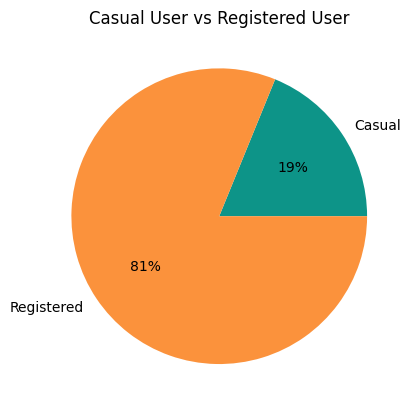

In [120]:
casual_user= sum(clean_daydata['casual'])
registered_user = sum(clean_daydata['registered'])

data = [casual_user, registered_user]
label = ['Casual', 'Registered']
colors = ['#0D9488','#FB923C']
plt.title('Casual User vs Registered User')
plt.pie(data, labels=label, colors=colors, autopct='%1.0f%%')
plt.show()

Dari grafik ini terlihat perbadingan antara jumlah pengguna registered dan jumlah pengguna casual yang cukup besar. Dimana jumlah pengguna registed berjumlah 81% dari jumlah total pengguna sedangkan jumlah pengguna casual hanya berjumlah 19% dari jumlah total pengguna.

### 2. Bagaimana Performa Bike Sharing selama tahun 2011 - 2012?

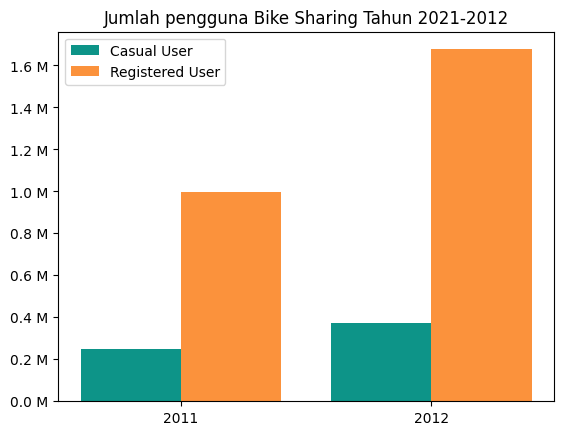

In [121]:
year_data = clean_daydata.groupby(by=['year',]).agg({
    'casual' : 'sum',
    'registered' : 'sum'
  }).reset_index()

X_axis = np.arange(len(year_data['year']))

plt.bar(X_axis - 0.2, year_data['casual'], 0.4, label = 'Casual User', color='#0D9488')
plt.bar(X_axis + 0.2, year_data['registered'], 0.4, label = "Registered User", color='#FB923C')

plt.xticks(X_axis, year_data['year'])
def millions(x, pos):
    return f'{x*1e-6:.1f} M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.title('Jumlah pengguna Bike Sharing Tahun 2021-2012')
plt.legend()
plt.show()

Dari Grafik terlihat bahwa pada tahun 2012 memang terjadi peningkatan jumlah pengguna bike sharing. Namun memang pengguna registered memiliki peningkatan jumlah pengguna yang lebih besar dibandingkan pengguna casual yang cenderung tidak memiliki peningkatan jumlah pengguna yang terlalu jauh di 2012.

<ipython-input-122-d3c7451c2261>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  yearmonth_data= clean_daydata.resample(rule='M', on='date').agg({


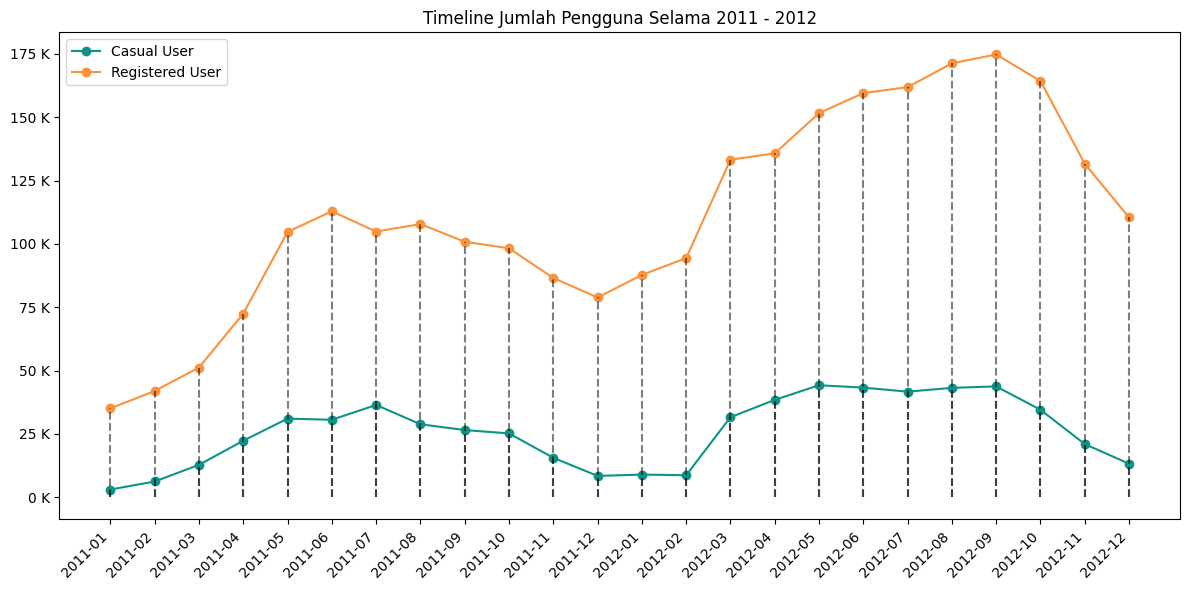

In [122]:
yearmonth_data= clean_daydata.resample(rule='M', on='date').agg({
    "casual": "sum",
    "registered": "sum"
})
yearmonth_data.index = yearmonth_data.index.strftime('%Y-%m')
yearmonth_data = yearmonth_data.reset_index()

X_axis = np.arange(len(yearmonth_data['date']))
plt.figure(figsize=(12, 6))

plt.plot(X_axis, yearmonth_data['casual'], label = 'Casual User', color='#0D9488', marker='o', markersize=6)
plt.plot(X_axis, yearmonth_data['registered'], label = 'Registered User', color='#FB923C', marker='o', markersize=6)

for i in range(len(X_axis)):
    plt.plot([X_axis[i], X_axis[i]], [0, yearmonth_data['casual'][i]], 'k--', alpha=0.5)  # Garis untuk Casual User
    plt.plot([X_axis[i], X_axis[i]], [0, yearmonth_data['registered'][i]], 'k--', alpha=0.5)  # Garis untuk Registered User

plt.xticks(X_axis, yearmonth_data['date'], rotation= 45, ha='right')

def kilos(x, pos):
    return f'{x*1e-3:.0f} K'

plt.gca().yaxis.set_major_formatter(FuncFormatter(kilos))
plt.title('Timeline Jumlah Pengguna Selama 2011 - 2012')
plt.legend()
plt.tight_layout()
plt.show()

Dari grafik ini terlihat semakin jelas bahwa pengguna bike sharing pada tahun 2012 jauh lebih banyak dibandingkan tahun 2011. Tren yang dimiliki oleh pengguna casual user maupun registered user cenderung hampir mirip namun trend pengguna casual jauh lebih stabil dibandingkan trend pengguna registered yang jauh lebih naik turun. Untuk tren pengguna dari tahun 2011 cenderung mirip dimana diawal tahun atau Q1 akan stabil atau meningkat sedikit lalu terjadi peningkatan besar di Q2 dan biasa hingga puncak jumlah terbesar ada di antara Q2 dan Q3 lalu di akhir Q3 akan mengalami penurun hingan akhir tahun atau Q4.

### 3. Apakah perubahan musim serta cuaca mempengaruhi performa Bike Sharing?

<ipython-input-123-2a266426030f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_data = clean_daydata.groupby(by=['season',]).agg({


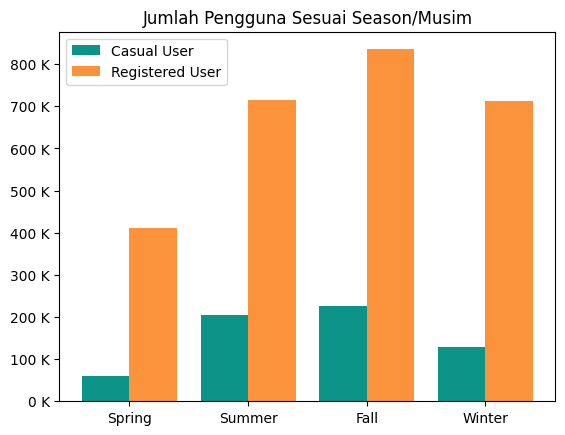

In [123]:
season_data = clean_daydata.groupby(by=['season',]).agg({
    'casual' : 'sum',
    'registered' : 'sum'
  }).reset_index()

X_axis = np.arange(len(season_data['season']))

plt.bar(X_axis - 0.2, season_data['casual'], 0.4, label = 'Casual User', color='#0D9488')
plt.bar(X_axis + 0.2, season_data['registered'], 0.4, label = "Registered User", color='#FB923C')

plt.xticks(X_axis, season_data['season'])

def kilos(x, pos):
    return f'{x*1e-3:.0f} K'

plt.gca().yaxis.set_major_formatter(FuncFormatter(kilos))
plt.title('Jumlah Pengguna Sesuai Season/Musim')
plt.legend()
plt.show()

Dari grafik kita melihat bahwa baik pengguna casual maupun pengguna registerd sama - sama menyukai musim fall/gugur untuk menggunakan bike sharing dan menghindari musim semi untuk menggunakan bike sharing.

<ipython-input-124-946e6f9eafe5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_data = clean_hourdata.groupby(by=['weather',]).agg({


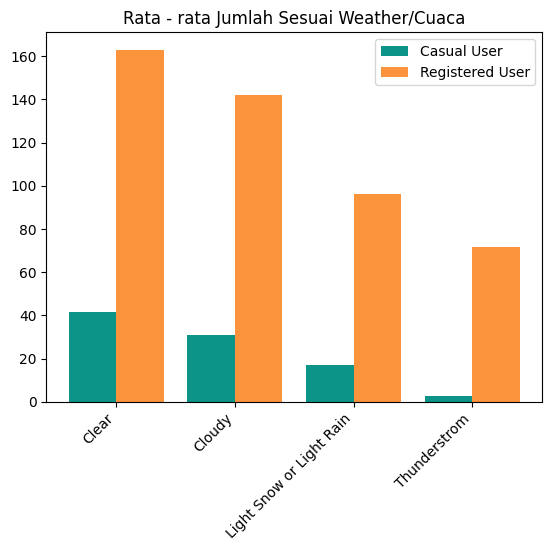

In [124]:
weather_data = clean_hourdata.groupby(by=['weather',]).agg({
    'casual' : 'mean',
    'registered' : 'mean'
  }).reset_index()

X_axis = np.arange(len(weather_data['weather']))

plt.bar(X_axis - 0.2, weather_data['casual'], 0.4, label = 'Casual User', color='#0D9488')
plt.bar(X_axis + 0.2, weather_data['registered'], 0.4, label = "Registered User", color='#FB923C')

plt.xticks(X_axis, weather_data['weather'], rotation= 45, ha='right')

plt.title('Rata - rata Jumlah Sesuai Weather/Cuaca')
plt.legend()
plt.show()

Dari grafik ini dapat dilihat bahwa cuaca juga mempengaruhi rata - rata jumlah pengguna bike sharing, baik pengguna casual maupun pengguna register. Dimana rata - rata pengguna bike sharing lebih memilih untuk menggunakan bike di cuaca cerah/clear dibandingkan cuaca buruk seperti hujan badai/thunderstorm. Jadi dapat disimpulkan bahwa baik musim maupun cuaca mempengaruhi jumlah pengguna dari bike sharing.

### 4. Apakah terdapat perbedaan jumlah pengguna Bike Sharing saat weekday dan weekend serta hari libur?

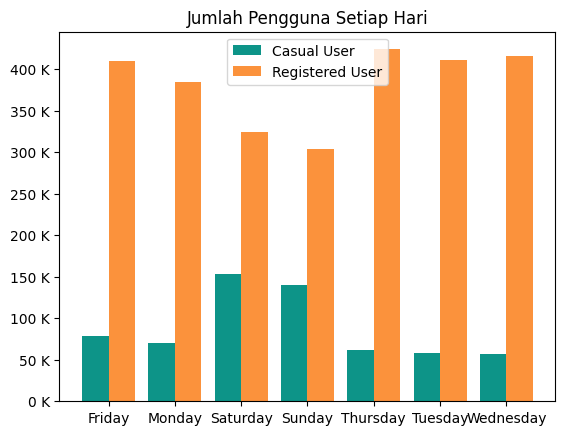

In [125]:
day_data = clean_daydata.groupby(by=['day_of_week',]).agg({
    'casual' : 'sum',
    'registered' : 'sum'
  }).reset_index()

X_axis = np.arange(len(day_data['day_of_week']))

plt.bar(X_axis - 0.2, day_data['casual'], 0.4, label = 'Casual User', color='#0D9488')
plt.bar(X_axis + 0.2, day_data['registered'], 0.4, label = "Registered User", color='#FB923C')

plt.xticks(X_axis, day_data['day_of_week'])

def kilos(x, pos):
    return f'{x*1e-3:.0f} K'

plt.gca().yaxis.set_major_formatter(FuncFormatter(kilos))
plt.title('Jumlah Pengguna Setiap Hari')
plt.legend()
plt.show()

Dilihat dari grafik jumlah pengguna casual meningkat di hari weekend seperti sabtu dan minggu dibandingkan dengan hari weekday. Sedangkan jumlah pengguna registered cenderung stabil setiap harinya dan malah mengalami penurunan di hari - hari weekend.

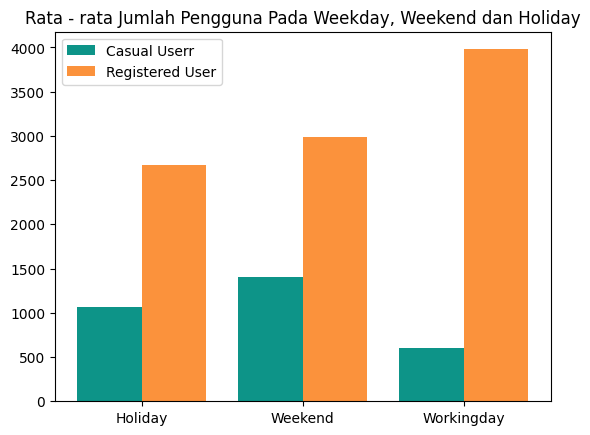

In [126]:
working_data = clean_daydata.groupby(by=['workingday',]).agg({
    'casual' : 'mean',
    'registered' : 'mean'
  }).reset_index()
X_axis = np.arange(len(working_data['workingday']))

plt.bar(X_axis - 0.2, working_data['casual'], 0.4, label = 'Casual Userr', color='#0D9488')
plt.bar(X_axis + 0.2, working_data['registered'], 0.4, label = "Registered User", color='#FB923C')

plt.xticks(X_axis, working_data['workingday'])
plt.title("Rata - rata Jumlah Pengguna Pada Weekday, Weekend dan Holiday")
plt.legend()
plt.show()

Lalu dilihat dari grafik ini semekin terlihat jelas bahwa rata - rata jumlah  pengguna casual meninggkat pada hari libur maupun weekend, sedangan rata - rata jumlah pengguna registered lebih banyak menggunakan bike sharing pada hari kerja dibandingkan hari libur atau weekend.

### 5. Bagaimana gambaran penjualan bike sharing dalam 24 jam setiap harinya?

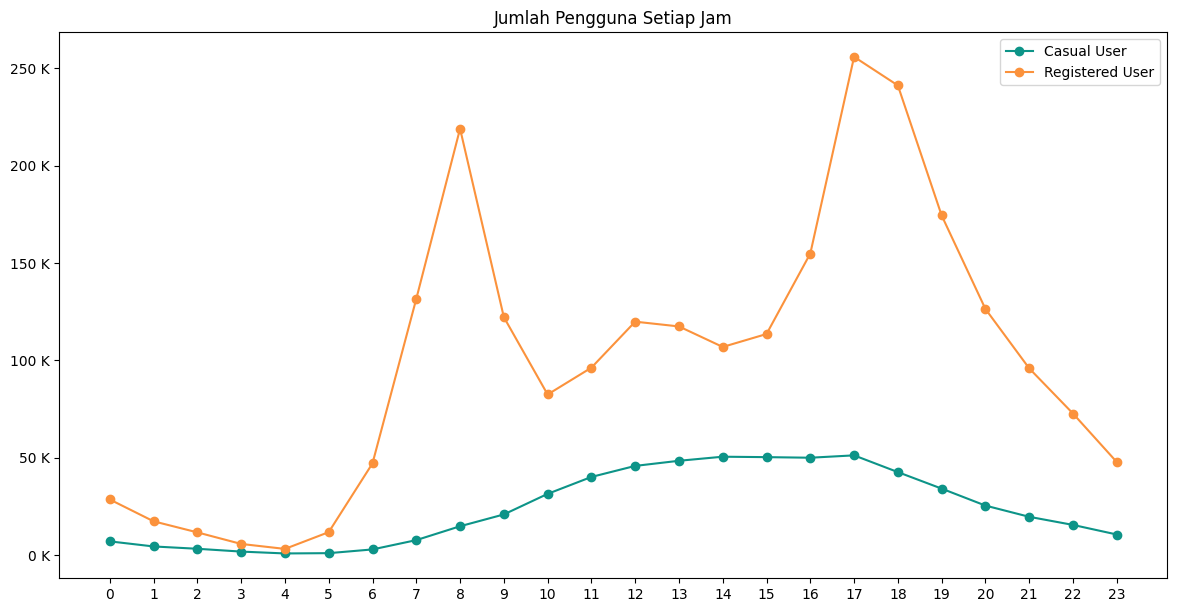

In [127]:
hour_user = clean_hourdata.groupby(by=['hour']).agg({
  'casual' : 'sum',
  'registered' : 'sum'
}).reset_index()

X_axis = np.arange(len(hour_user['hour']))
plt.figure(figsize=(12, 6))
plt.plot(X_axis, hour_user['casual'], label = 'Casual User', color='#0D9488', marker='o', markersize=6)
plt.plot(X_axis, hour_user['registered'], label = 'Registered User', color='#FB923C', marker='o', markersize=6)

plt.xticks(X_axis, hour_user['hour'])
plt.tight_layout()

def kilos(x, pos):
    return f'{x*1e-3:.0f} K'

plt.gca().yaxis.set_major_formatter(FuncFormatter(kilos))
plt.title('Jumlah Pengguna Setiap Jam')
plt.legend()
plt.show()

Dari grafik terilihat bahwa pengguna registered akan mengalami jumlah terbesar pada pukul 8.00, 17.00 dan pukul 18.00. Untuk pengguna casual cenderung stabil dan mengalami kenaikan pada pukul 7.00 hinggan pukul 17.00 akan mengalami penurunan jumlah pengguna.

## Conclusion

Question 1 :
- Jumlah Pengguna Registered jauh lebih banyak dibandingkan pengguna casual dengan perbandingan 81% : 19%.

Question 2 :     
- Perfoma bike sharing pada tahun 2012 jauh lebih meningkat. Hal ini dapat dilihat dari jumlah pengguna bike sharing yang meningkat di 2012 terutama jumlah pengguna registered yang mengalami kenaikan yang sangat besar apabila dibandingka dengan kenaikan jumlah pengguna casual.
-Trend pengguna bike sharing hampir sama baik 2011 atau 2012. Selain itu jika dilihat antara pengguna casual dan registered trennya masih tetap sama hanya saja trend pengguna casual jaul lebih stabil. Trend ini akan dimulai di awal tahun yang cenderung stabil lalu di pertengahan tahun terjadi kenaikan setelah di menjelang akhir tahun akan terjadi penurunan sampai akhir tahun.

Question 3 :    
- Jumlah Pengguna bike sharing baik dari pengguna casual maupun registered lebih banyak pada musim gugur dan pada cuaca yang cerah dan lebih sedikit pada musim semi dan cuaca hujan badai.
- Jadi baik musim ataupun cuaca berpengaruh terhadap performa Bike Sharing hal ini dilihat dari beberapa musim dan cuaca yang memiliki jumlah pengguna yang banyak serta ada juga musim dan cuaca yang memiliki jumlah pengguna yang sedikit.

Question 4 :    
- Jumlah Pengguna casual cenderung lebih banyak pada hari minggu dan sabtu, sedangkan jumlah pengguna registered jumlah hampir stabil setiap harinya namun pada weekend justru mengalami penurunan.
- Jumlah Pengguna casual lebih banyak di hari libur dan weekend, sendangkan jumlah pengguna registered lebih banyak di hari kerja.

Question 5 :    
- Pengguna registered mengalami jumlah terbanyak pada pukul 08.00, 09,00 dan 17.00.
Pengguna casual mengalami jumlah yang stabil setiap jamnya namun akan meningkat pukul 08.00 lalu turun di pukul 17.00.

Tambahan :
- Jawaban dari Question 2 dan 3 saling berhubungan. Dari jawaban Question 3 kita tahu bahwa musim yang paling banyak diminati oleh pengguna bike sharing adalah musim gugur sedangkan musim yang tidak dimaninati adalah musim semi. Tren tahunan pengguna bike sharing sepertinya berhubungan dengan hal ini dikarenakan kita tau dimana musim gugur biasanya berada di Q3 dan Q3 merupakan puncak dari jumlah pengguna bike sharing dalam 1 tahun. Hal ini juga terlihat di Q1 yang berjumlah paling sedikit dalam 1 tahun yang merupakan waktu dimulainya musim semi.   
- Dilihat dari Kesimpulan Question 4 dan 5 dapat disimpulkan bahwa pengguna registered menggunakan bike sharing untuk bekerja hal ini dapat dilihat dari jumlahnya yang lebih banyak pada hari kerja dan jam pergi dan pulang kerja.
- Sedangkan pengguna casual cenderung menggukan bike sharing untuk kegiatan harian serta kegiatan santai. Hal ini dapat dilihat dimana mereka lebih memilih hari libur dan hari weekend dibandingkan hari kerja.

